<a href="https://colab.research.google.com/github/vigneshbaskar1410/Machine-Learning-Projects/blob/main/Image_Classification_by_CNN_Using_CIFAR_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Image Classification Using CIFAR Dataset**

## **About CIFAR dataset**

The CIFAR-10 data set is composed of 60,000 32x32 colour images, 6,000 images per class, so 10 categories in total. The training set is made up of 50,000 images, while the remaining 10,000 make up the testing set.

The categories are: airplane, automobile, bird, cat, deer, dog, frog, horse, ship and truck.

This includes how to develop a robust test harness for estimating the performance of the model, how to explore improvements to the model, and how to save the model and later load it to make predictions on new data.

# **Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
import matplotlib.pyplot as plt 

# **Importing Data**
CIFAR-10 is a dataset of 50,000 32x32 color raining images, labeled over 10 categories and 10,000 test images.

In [ ]:
from tensorflow.keras.datasets import cifar10
(x_train,y_train), (x_test, y_test) = cifar10.load_data()

In [ ]:
x_train.shape                       # shape of X_train

(50000, 32, 32, 3)

In [ ]:
x_train[0].shape

(32, 32, 3)

## **Plotting few images from X_train**

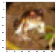

In [ ]:
# FROG
plt.figure(figsize = (6,4),dpi = 16 )
plt.imshow(x_train[0])

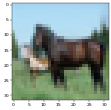

In [ ]:
#Horse
plt.figure(figsize = (6,4),dpi = 32 )
plt.imshow(x_train[12])

# **Data PreProcessing**

In [ ]:
x_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [ ]:
x_train[0].shape

(32, 32, 3)

In [ ]:
x_train.max()

255

**Scaling the data to the range between 0 and 1 by dividing it by 255.**

In [ ]:
x_train = x_train/255

In [ ]:
x_test = x_test/255

In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
x_test.shape

(10000, 32, 32, 3)

# **Label**

Using one hot encoding for the class element of each sample, transforming the integer into a 10 element binary vector. We can do this using to_categorical() utility function.

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
y_train[0]

array([6], dtype=uint8)

In [ ]:
y_cat_train = to_categorical(y_train, 10)

In [ ]:
y_cat_train.shape

(50000, 10)

In [ ]:
y_cat_train[0]

array([0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000,
       1.000000, 0.000000, 0.000000, 0.000000], dtype=float32)

In [ ]:
y_cat_test = to_categorical(y_test, 10)

In [ ]:
y_cat_test.shape

(10000, 10)

In [ ]:
y_cat_test[0]

array([0.000000, 0.000000, 0.000000, 1.000000, 0.000000, 0.000000,
       0.000000, 0.000000, 0.000000, 0.000000], dtype=float32)

# **Building the Model**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

**A Sequential model is appropriate for a linear stack of layers where each layer has exactly one input tensor and one output tensor.**


In [ ]:
model = Sequential()

In [ ]:
# FIRST SET OF LAYERS

# CONVOLUTION LAYER
model.add(Conv2D(filters = 32, kernel_size = (4,4),
                 input_shape = (32,32,3), activation = 'relu'))     # Here channel is 3 since it is a colour image


The first down-sampling layer uses max pooling with a 2x2 kernel and stride set to 2. This effectively drops the size from 6x28x28 to 6x14x14.

In [ ]:
# POOLING LAYER
model.add(MaxPool2D(pool_size = (2,2)))

In [ ]:
## SECOND SET OF LAYERS

# CONVOLUTION LAYER
model.add(Conv2D(filters = 32, kernel_size = (4,4),
                 input_shape = (32,32,3), activation = 'relu'))

The second down-sampling layer uses max pooling with a 2x2 kernel and stride set to 2. This effectively drops the size from 16x10x10 to 16x5x5.

In [ ]:
#Pooling layer
model.add(MaxPool2D(pool_size = (2,2)))

The feature maps output from the feature extraction part of the model must be flattened. We can then interpret them with one or more fully connected layers, and then output a prediction. The output layer must have 10 nodes for the 10 classes and use the softmax activation function.

In [ ]:
# Flattening  images from 28 by 28  to 764 BEFORE FINAL LAYER
model.add(Flatten())

In [ ]:
# 256 Neurons in dense hidden layer ()
model.add(Dense(256,activation = 'relu'))

In [ ]:
# last layer is the classifier, THUS 10 possible classes
model.add(Dense(10, activation = 'softmax'))

## **Model Compiling**

Keras is built on top of Theano and TensorFlow. Both packages allow you to define a *computation graph* in Python, which then compiles and runs efficiently on the CPU or GPU without the overhead of the Python interpreter.

When compiing a model, Keras asks you to specify your **loss function** and your **optimizer**. The loss function we'll use here is called *categorical cross-entropy*, and is a loss function well-suited to comparing two probability distributions.

Our predictions are probability distributions across the ten different digits (e.g. "we're 80% confident this image is a 3, 10% sure it's an 8, 5% it's a 2, etc."), and the target is a probability distribution with 100% for the correct category, and 0 for everything else. The cross-entropy is a measure of how different your predicted distribution is from the target distribution.

The optimizer helps determine how quickly the model learns through **gradient descent**. The rate at which descends a gradient is called the **learning rate**.

In [ ]:
model.compile(loss = 'categorical_crossentropy', 
              optimizer = 'rmsprop',
              metrics = ['accuracy'])

In [ ]:
# Summarize the built model
#trainable params : means the number of weights that are updated during training with backpropagation.
#Non-trainable params : means the number of weights that are not updated during training with backpropagation.

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 32)        16416     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 800)               0         
                                                                 
 dense_2 (Dense)             (None, 256)              

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping         # importing EarlyStopping

**Early stopping will Stop training when a monitored metric has stopped improving.**


**Patience: Number of epochs with no improvement after which training will be stopped.**

In [ ]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 3)

# **Train the Model**

The batch size determines over how much data per step is used to compute the loss function, gradients, and back propagation. Large batch sizes allow the network to complete it's training faster; however, there are other factors beyond training speed to consider.

Too large of a batch size smoothes the local minima of the loss function, causing the optimizer to settle in one because it thinks it found the global minimum.

Too small of a batch size creates a very noisy loss function, and the optimizer may never find the global minimum.

So a good batch size may take some trial and error to find!

In [ ]:
model.fit(x_train, y_cat_train, epochs = 5,
          validation_data = (x_test,y_cat_test), 
          callbacks = [early_stop])

Epoch 1/5
1563/1563 [==============================] - 66s 42ms/step - loss: 1.5197 - accuracy: 0.4556 - val_loss: 1.2973 - val_accuracy: 0.5480
Epoch 2/5
1563/1563 [==============================] - 70s 45ms/step - loss: 1.1638 - accuracy: 0.5947 - val_loss: 1.0941 - val_accuracy: 0.6236
Epoch 3/5
1563/1563 [==============================] - 64s 41ms/step - loss: 1.0051 - accuracy: 0.6518 - val_loss: 1.2072 - val_accuracy: 0.5855
Epoch 4/5
1563/1563 [==============================] - 63s 40ms/step - loss: 0.8968 - accuracy: 0.6901 - val_loss: 1.0057 - val_accuracy: 0.6623
Epoch 5/5
1563/1563 [==============================] - 64s 41ms/step - loss: 0.8188 - accuracy: 0.7214 - val_loss: 0.9496 - val_accuracy: 0.6788


In [ ]:
model.save('cifar_10epochs.h5') # we can save the final model to an H5 file by calling the save() function and pass in the chosen filename.

# **Model Evaluation**

In [ ]:
losses = pd.DataFrame(model.history.history)

In [ ]:
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,1.519672,0.45562,1.297270,0.5480
1,1.163758,0.59470,1.094097,0.6236
2,1.005110,0.65176,1.207248,0.5855
3,0.896848,0.69014,1.005690,0.6623
4,0.818790,0.72142,0.949564,0.6788


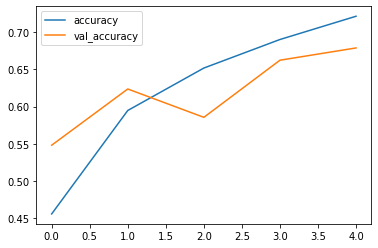

In [ ]:
losses[['accuracy','val_accuracy']].plot();

**From the graph, we can able see that both training error and validation error have been reducing, so we consider that out model is performing well in both training and validation set .**

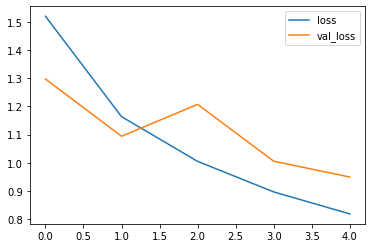

In [ ]:
losses[['loss','val_loss']].plot();

In [ ]:
model.metrics_names

['loss', 'accuracy']

In [ ]:
print(model.metrics_names)
print(model.evaluate(x_test,y_cat_test,verbose = 0))

['loss', 'accuracy']
[0.9495636820793152, 0.6787999868392944]


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
predict_x = model.predict(x_test)
predict_classes = np.argmax(predict_x,axis=1)

313/313 [==============================] - 3s 10ms/step


**Printing the Classification report which shows all details of the accuracy**

In [ ]:
print(classification_report(y_test,predict_classes))

              precision    recall  f1-score   support

           0       0.63      0.79      0.70      1000
           1       0.78      0.81      0.80      1000
           2       0.61      0.52      0.56      1000
           3       0.58      0.35      0.44      1000
           4       0.69      0.56      0.62      1000
           5       0.58      0.59      0.59      1000
           6       0.64      0.84      0.73      1000
           7       0.69      0.78      0.73      1000
           8       0.82      0.76      0.79      1000
           9       0.76      0.77      0.76      1000

    accuracy                           0.68     10000
   macro avg       0.68      0.68      0.67     10000
weighted avg       0.68      0.68      0.67     10000



## **Confusion Matrix**

In [ ]:
confusion_matrix(y_test,predict_classes)

array([[792,  29,  39,   6,  17,   4,  12,  18,  46,  37],
       [ 36, 813,   7,   8,   3,   3,  18,   6,  20,  86],
       [102,   9, 517,  43,  68,  86, 102,  43,  16,  14],
       [ 44,  22,  66, 348,  64, 214, 123,  68,  26,  25],
       [ 37,  10,  77,  30, 564,  44, 116,  98,  15,   9],
       [ 24,  10,  55, 100,  44, 595,  61,  83,  13,  15],
       [ 17,   8,  34,  29,  19,  23, 844,  13,   6,   7],
       [ 30,   8,  35,  17,  33,  45,  23, 782,   3,  24],
       [128,  35,  11,   5,   5,   9,   8,   8, 760,  31],
       [ 42,  92,  10,  11,   2,   5,  17,  21,  27, 773]])

## **Visualizing the Confusion Matrix**

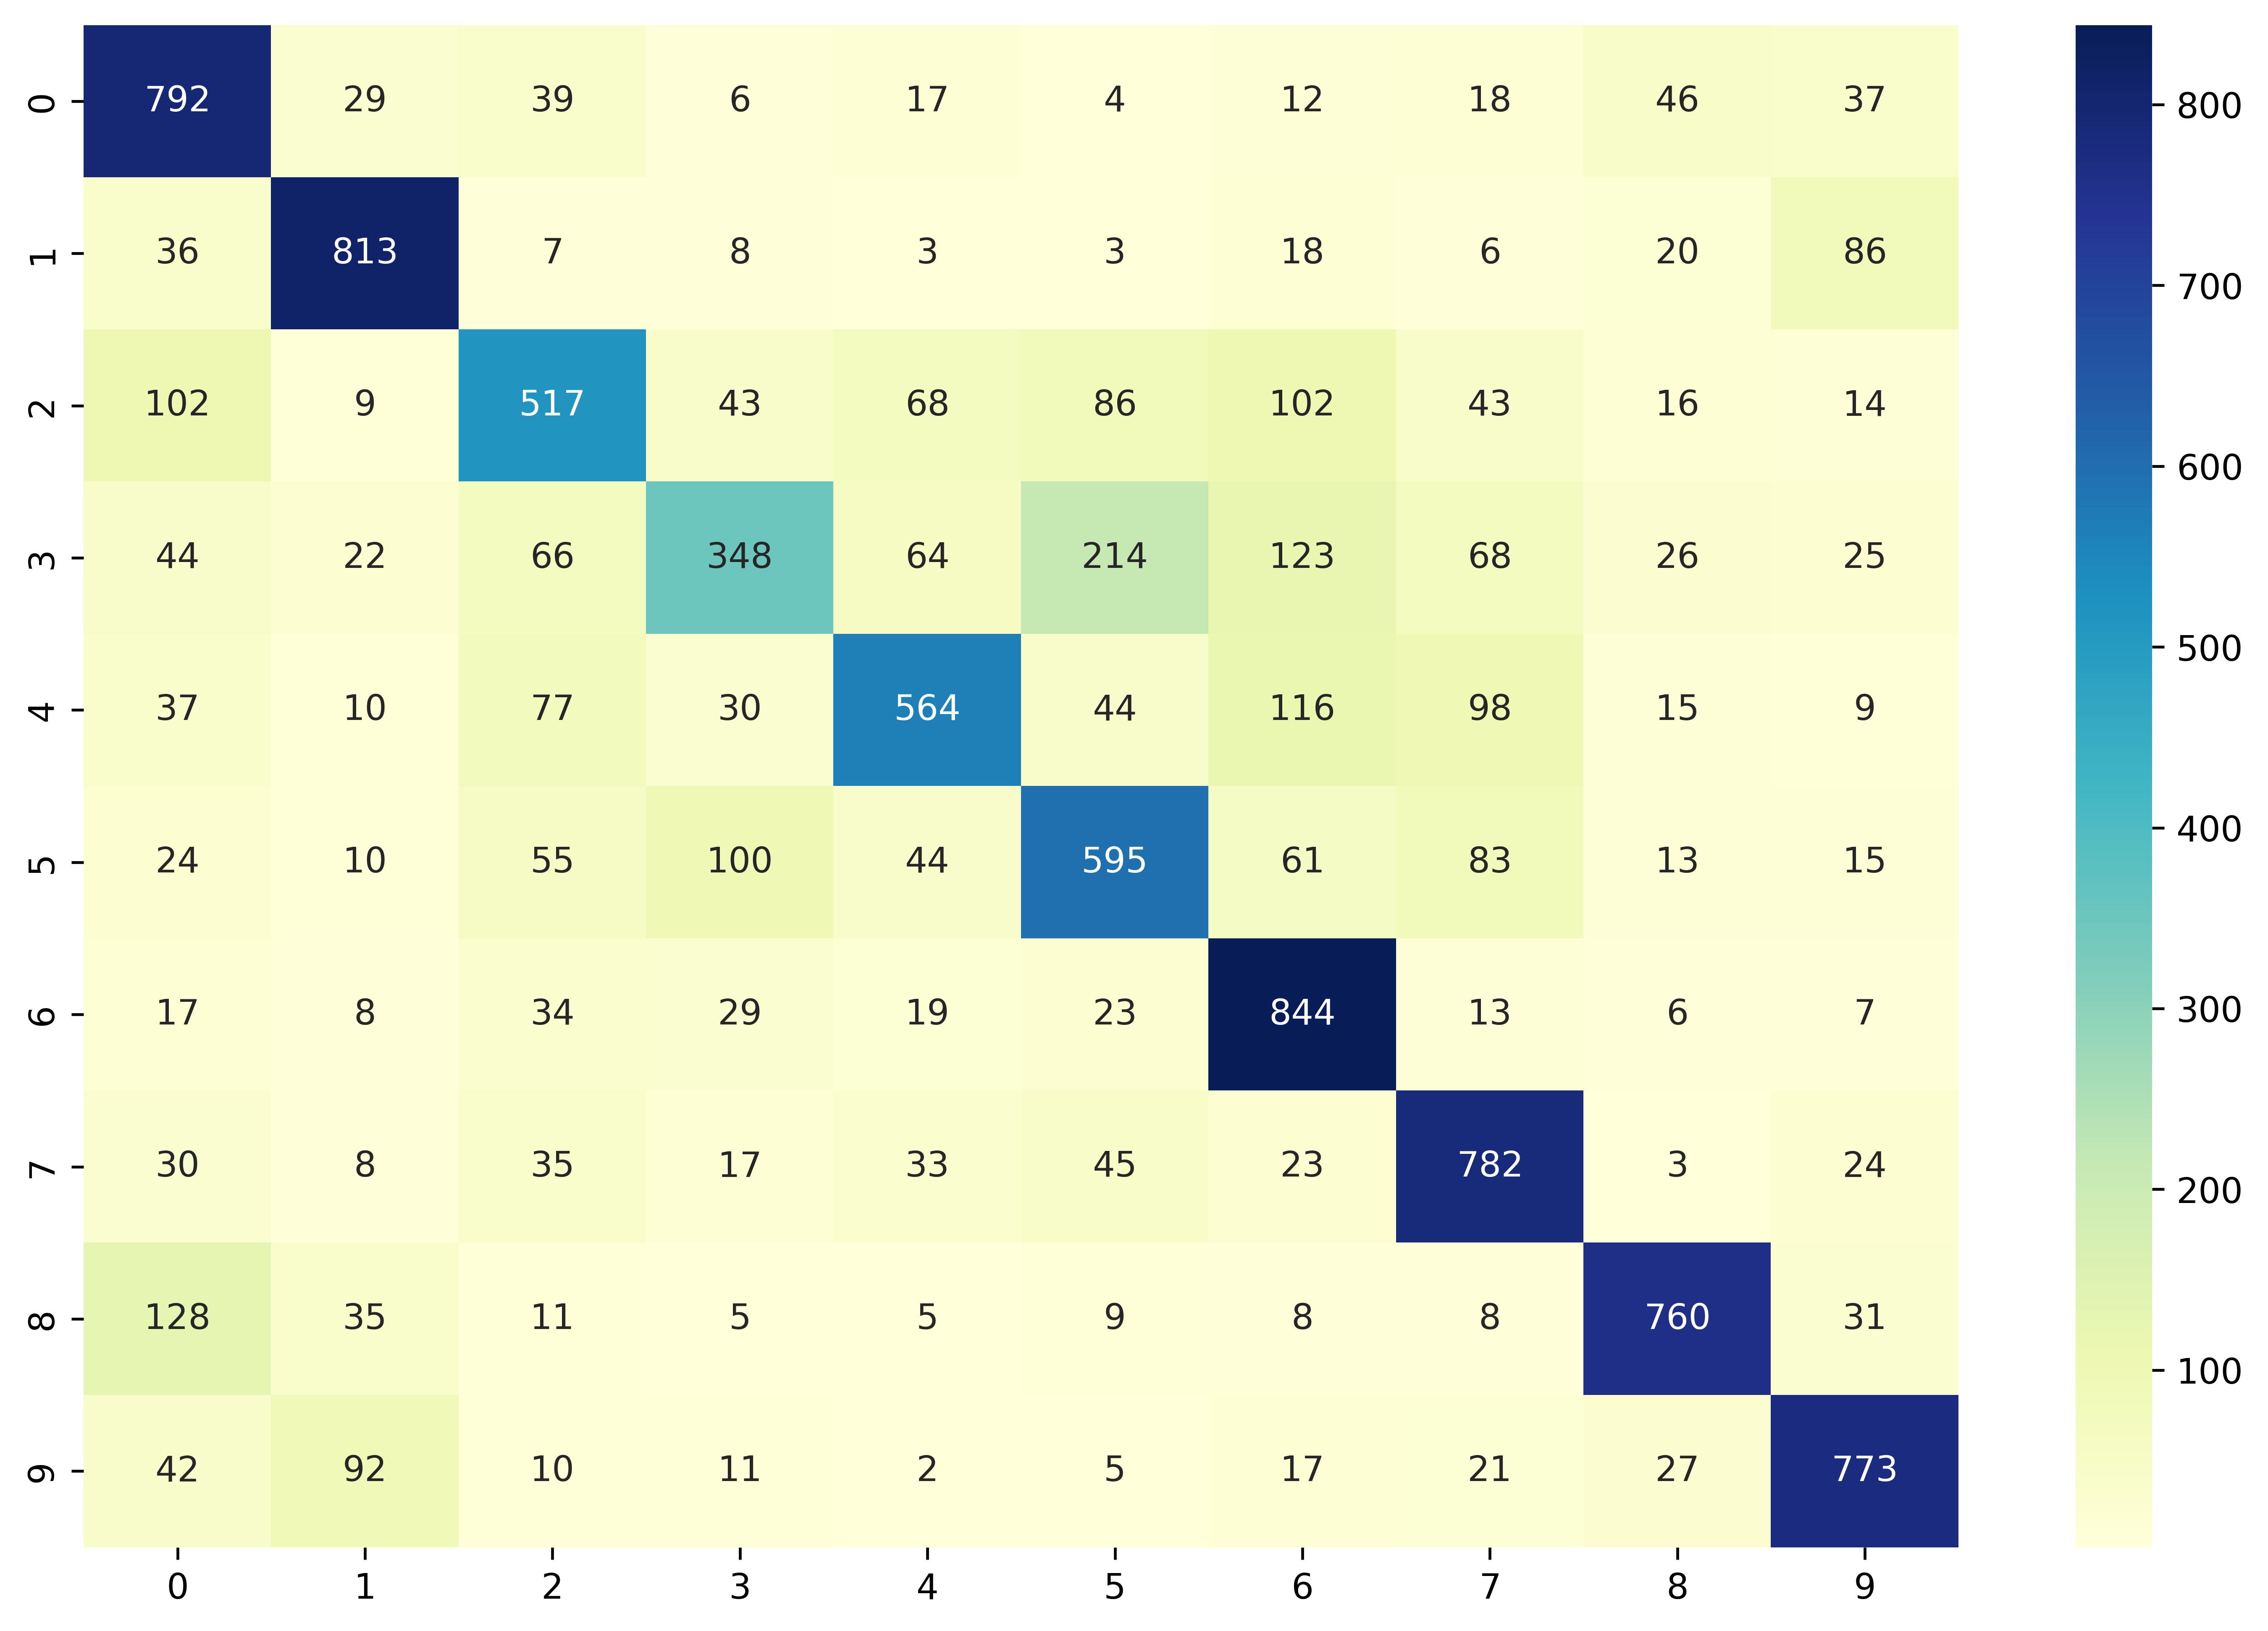

In [ ]:
import seaborn as sns
plt.figure(figsize=(12,8), dpi = 600)
sns.heatmap(confusion_matrix(y_test,predict_classes),cmap="YlGnBu", annot=True, fmt='g');

# **Predicting a given image**

In [ ]:
my_image1 = x_test[21]

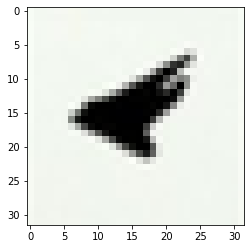

In [ ]:
plt.imshow(my_image1)

In [ ]:
np.set_printoptions(formatter = {'float_kind': '{:f}'.format})
# SHAPE --> (num_images,width,height,color_channels)
model.predict(my_image1.reshape(1,32,32,3))

1/1 [==============================] - 0s 17ms/step


array([[0.053490, 0.000000, 0.946510, 0.000000, 0.000000, 0.000000,
        0.000000, 0.000000, 0.000000, 0.000000]], dtype=float32)

## **The model Predicted correctly that it is a bird with 94.6 percent surety**

In [ ]:
my_image2 = x_test[82]

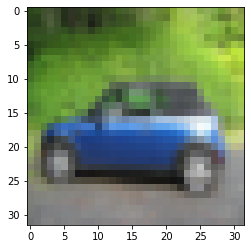

In [ ]:
plt.imshow(my_image2)

In [ ]:
np.set_printoptions(formatter = {'float_kind': '{:f}'.format})
# SHAPE --> (num_images,width,height,color_channels)
model.predict(my_image2.reshape(1,32,32,3))

1/1 [==============================] - 0s 19ms/step


array([[0.000008, 0.998843, 0.000005, 0.000003, 0.000000, 0.000001,
        0.000000, 0.000001, 0.000002, 0.001137]], dtype=float32)

## **The model Predicted correctly that it is a automobile with 99.8 percent surety.**